In [1]:
import random

In [9]:
random.randint(0,5)


3

In [1]:
import torch
a = torch.tensor([1.0])
a.requires_grad = True # 或者 a.requires_grad_()
print(a)
print(a.data)
print(a.type())             # a的类型是tensor
print(a.data.type())        # a.data的类型是tensor
print(a.grad)
print(type(a.grad))

tensor([1.], requires_grad=True)
tensor([1.])
torch.FloatTensor
torch.FloatTensor
None
<class 'NoneType'>


predict (before training) 4 21.0
	grad: 1.0 2.0 tensor([1.]) tensor([1.]) tensor([1.])
	grad: 2.0 4.0 tensor([0.9800]) tensor([0.9800]) tensor([0.9800])
	grad: 3.0 6.0 tensor([0.7512]) tensor([0.8656]) tensor([0.9228])
progress: 0 18.321826934814453
	grad: 1.0 2.0 tensor([-0.0193]) tensor([0.6088]) tensor([0.8372])
	grad: 2.0 4.0 tensor([-0.0078]) tensor([0.6202]) tensor([0.8487])
	grad: 3.0 6.0 tensor([0.1476]) tensor([0.6979]) tensor([0.8875])
progress: 1 2.858394145965576
	grad: 1.0 2.0 tensor([0.4519]) tensor([0.7994]) tensor([0.9213])
	grad: 2.0 4.0 tensor([0.4484]) tensor([0.7959]) tensor([0.9179])
	grad: 3.0 6.0 tensor([0.4242]) tensor([0.7838]) tensor([0.9118])
progress: 2 1.1675907373428345
	grad: 1.0 2.0 tensor([0.2297]) tensor([0.7189]) tensor([0.8902])
	grad: 2.0 4.0 tensor([0.2329]) tensor([0.7222]) tensor([0.8934])
	grad: 3.0 6.0 tensor([0.2913]) tensor([0.7514]) tensor([0.9080])
progress: 3 0.04653334245085716
	grad: 1.0 2.0 tensor([0.3302]) tensor([0.7643]) tensor([0.91

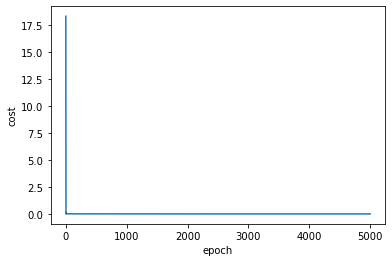

In [2]:
import torch
import matplotlib.pyplot as plt

# quadratic model y^=w1x^2 + w2x + b

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
 
w1 = torch.tensor([1.0]) # w1的初值为1.0
w1.requires_grad = True # 需要计算梯度

w2 = torch.tensor([1.0]) # w2的初值为1.0
w2.requires_grad = True # 需要计算梯度

b = torch.tensor([1.0]) # b的初值为1.0
b.requires_grad = True # 需要计算梯度

def forward(x):
    return w1*x*x + w2*x + b # w是一个Tensor
 
 
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y)**2
 
print("predict (before training)", 4, forward(4).item())

epoch_list = [] # 存起来好画图
cost_list = []

w1_list = []
w2_list = []
b_list = []

for epoch in range(5000):
    for x, y in zip(x_data, y_data):
        l =loss(x,y) # l是一个张量，tensor主要是在建立计算图 forward, compute the loss
        l.backward() #  backward,compute grad for Tensor whose requires_grad set to True
        print('\tgrad:', x, y, w1.data, w2.data, b.data)
        w1.data = w1.data - 0.01 * w1.grad.data   # 权重更新时，注意grad也是一个tensor
        w2.data = w2.data - 0.01 * w2.grad.data
        b.data = b.data - 0.01 * b.grad.data

        w1.grad.data.zero_() # after update, remember set the grad to zero
        w2.grad.data.zero_() 
        b.grad.data.zero_() 
 
    print('progress:', epoch, l.item()) # 取出loss使用l.item，不要直接使用l（l是tensor会构建计算图）
    epoch_list.append(epoch)

    cost_list.append(l.item())
    w1_list.append(w1.item())
    w2_list.append(w2.item())
    b_list.append(b.item())
 
print("predict (after training)", 4, forward(4).item())

plt.figure(1)
plt.plot(epoch_list,cost_list)#画在图1上
plt.ylabel('cost')
plt.xlabel('epoch')
plt.show() 

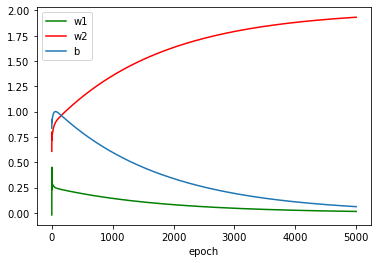

In [13]:
plt.figure(2)
plt.plot(epoch_list,w1_list, "g", label="w1")#画在图2上，且不在一个窗口
plt.plot(epoch_list,w2_list, "r", label="w2")
plt.plot(epoch_list,b_list, label="b")
plt.legend()
plt.xlabel("epoch")
plt.show()


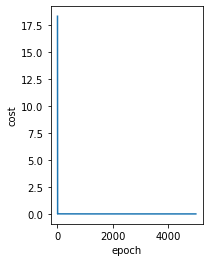

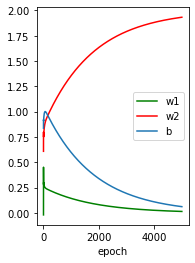

In [16]:
plt.figure(1)
plt.subplot(1, 2, 1) #图一包含1行2列子图，当前画在第一行第一列图上
plt.plot(epoch_list,cost_list)
plt.ylabel('cost')
plt.xlabel('epoch')
plt.show() 

plt.figure(1)
plt.subplot(1, 2, 2)#当前画在第一行第2列图上
plt.plot(epoch_list,w1_list, "g", label="w1")
plt.plot(epoch_list,w2_list, "r", label="w2")
plt.plot(epoch_list,b_list, label="b")
plt.legend()
plt.xlabel("epoch")
plt.show()


In [18]:
loss = torch.nn.MSELoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5)
output = loss(input, target)
output.backward()

In [19]:
input

tensor([[-0.9990, -1.1391,  0.8421,  0.9382,  0.1496],
        [-0.0941, -0.6069, -0.7515, -1.9986, -0.5891],
        [-1.4727,  0.3770,  0.1876,  0.3304, -0.9859]], requires_grad=True)

In [20]:
target

tensor([[-0.8687, -0.5700, -1.1293,  0.0056,  1.0946],
        [ 0.8840,  0.4898,  0.8523, -0.1703,  0.7227],
        [ 0.5656, -0.1567,  0.6889, -3.4668,  0.2257]])

In [24]:
output

tensor(2.4242, grad_fn=<MseLossBackward0>)

In [1]:
import torchvision